In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [89]:
df=pd.read_csv(r"C:\Users\OWNER\Desktop\VICTOR\Customer-Churn-Records.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9967,9968,15603794,Pugliesi,623,France,Male,48,5,118469.38,1,1,1,158590.25,0,0,4,PLATINUM,346
6564,6565,15737104,Lawson,652,Germany,Female,47,0,126597.89,2,1,1,38798.79,1,1,1,PLATINUM,696
5157,5158,15751185,Aparicio,699,Spain,Female,50,0,158633.61,1,1,0,193785.87,0,0,1,SILVER,835
8523,8524,15567778,Genovese,690,Germany,Female,54,1,144027.80,1,1,1,108731.02,1,1,5,SILVER,480
2361,2362,15635776,Trevisani,686,Germany,Female,43,5,154846.24,2,1,1,151903.60,0,0,5,DIAMOND,546


In [90]:
df.drop(["CustomerId","RowNumber"],axis="columns",inplace=True)
df.head(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [91]:
df.dtypes

Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [92]:
df.isnull().sum()

Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [93]:
df.shape

(10000, 16)

In [94]:
def print_unique_col_value(df):
    for column in df:
        if df[column].dtypes=="object":
            print(f"{column}: {df[column].unique()}")

In [95]:
print_unique_col_value(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Card Type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [96]:
df["Surname"].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [97]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [98]:
df.drop("Surname",axis="columns",inplace=True)

In [99]:
print_unique_col_value(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Card Type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [100]:
columns=["Geography","Gender","Card Type"]

In [101]:
df1=pd.get_dummies(data=df,columns=columns)
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [102]:
df1.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
8650,637,27,1,0.00,2,1,0,91291.20,0,0,...,304,1,0,0,0,1,0,1,0,0
5989,668,53,10,110240.04,1,0,0,183980.56,1,1,...,682,1,0,0,1,0,0,0,0,1
2763,706,47,6,120621.89,1,1,1,140803.70,0,0,...,870,0,1,0,1,0,1,0,0,0
9578,662,34,2,117731.79,2,0,1,55120.79,0,0,...,792,1,0,0,0,1,0,1,0,0
1681,681,32,3,0.00,2,1,1,59679.90,0,0,...,526,0,0,1,1,0,0,0,0,1


In [103]:
df1.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_France        uint8
Geography_Germany       uint8
Geography_Spain         uint8
Gender_Female           uint8
Gender_Male             uint8
Card Type_DIAMOND       uint8
Card Type_GOLD          uint8
Card Type_PLATINUM      uint8
Card Type_SILVER        uint8
dtype: object

In [104]:
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [105]:
col_to_scale=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary' , 'Complain', 'Satisfaction Score', 'Point Earned']

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[col_to_scale]=scaler.fit_transform(df1[col_to_scale])

In [107]:
for col  in df1:
    print(f"{col}: {df1[col].unique()}")

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [108]:
x=df1.drop("Exited",axis="columns")
y=df1.Exited
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [109]:
y_train.value_counts()

0    6367
1    1633
Name: Exited, dtype: int64

In [110]:
import tensorflow as tf
from tensorflow import keras

In [111]:
x_train.shape

(8000, 20)

In [112]:
model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,),activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
    
    
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"]
            
)


model.fit(x_train,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 19s 31ms/step - loss: 0.3767 - accuracy: 0.8274
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0260 - accuracy: 0.9984
Epoch 3/10
250/250 [==============================] - 11s 45ms/step - loss: 0.0124 - accuracy: 0.9984
Epoch 4/10
250/250 [==============================] - 9s 35ms/step - loss: 0.0111 - accuracy: 0.9984
Epoch 5/10
250/250 [==============================] - 8s 31ms/step - loss: 0.0108 - accuracy: 0.9984
Epoch 6/10
250/250 [==============================] - 10s 41ms/step - loss: 0.0105 - accuracy: 0.9984
Epoch 7/10
250/250 [==============================] - 8s 34ms/step - loss: 0.0104 - accuracy: 0.9984
Epoch 8/10
250/250 [==============================] - 11s 45ms/step - loss: 0.0103 - accuracy: 0.9984
Epoch 9/10
250/250 [==============================] - 14s 55ms/step - loss: 0.0103 - accuracy: 0.9984
Epoch 10/10
250/250 [==============================] - 26s 103ms/step - loss: 0.0101 -

In [113]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 8s 57ms/step - loss: 0.0058 - accuracy: 0.9995


[0.005821821745485067, 0.9994999766349792]

In [114]:

yp=model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 [==============================] - 5s 48ms/step


In [115]:
from sklearn.metrics import confusion_matrix,classification_report

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(95.72222222222221, 0.5, 'Truth')

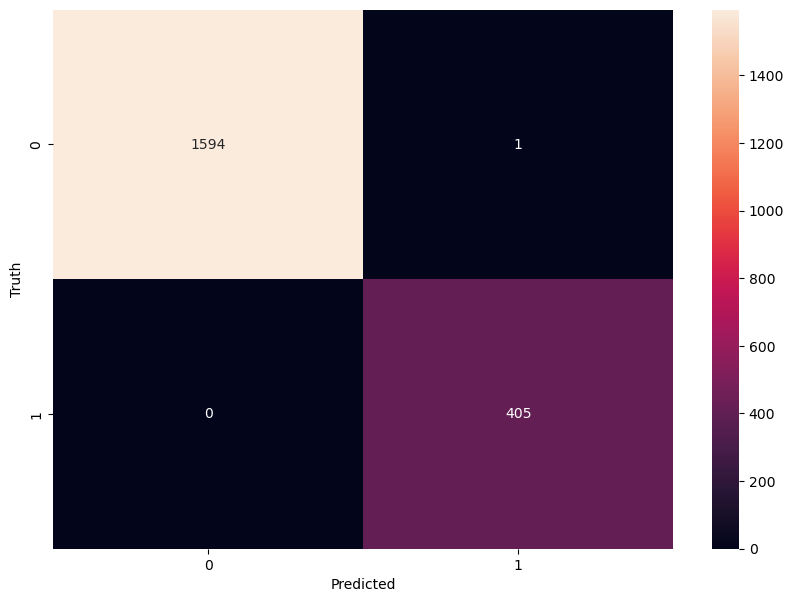

In [117]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:
modeld = keras.Sequential([
    keras.layers.Dense(20, input_dim=20, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(x_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
1000/1000 [==============================] - 82s 60ms/step - loss: 0.4448 - accuracy: 0.7908
Epoch 2/10
1000/1000 [==============================] - 54s 54ms/step - loss: 0.1512 - accuracy: 0.9300
Epoch 3/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.0812 - accuracy: 0.9744
Epoch 4/10
1000/1000 [==============================] - 64s 64ms/step - loss: 0.0715 - accuracy: 0.9834
Epoch 5/10
1000/1000 [==============================] - 43s 43ms/step - loss: 0.0584 - accuracy: 0.9849
Epoch 6/10
1000/1000 [==============================] - 36s 36ms/step - loss: 0.0544 - accuracy: 0.9871
Epoch 7/10
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0609 - accuracy: 0.9851
Epoch 8/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0493 - accuracy: 0.9896
Epoch 9/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0539 - accuracy: 0.9856
Epoch 10/10
1000/1000 [==============================] - 7s 7ms/st

In [119]:
modeld.evaluate(x_test,y_test)

63/63 [==============================] - 4s 29ms/step - loss: 0.0072 - accuracy: 0.9995


[0.0072343479841947556, 0.9994999766349792]

In [120]:
print(classification_report(y_test,y_predt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [121]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(32, input_dim=20, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=10)
    else:
        model.fit(x_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [122]:
count_exited_0,count_exited_1=df1.Exited.value_counts()
df_exited_0=df1[df1["Exited"]==0]
df_exited_1=df1[df1["Exited"]==1]

In [123]:
df_exited_0_under=df_exited_0.sample(count_exited_1)
df_test_under=pd.concat([df_exited_0_under,df_exited_1],axis=0)
df_test_under.Exited.value_counts()

0    2038
1    2038
Name: Exited, dtype: int64

In [124]:
x=df_test_under.drop("Exited",axis=1)
y=df_test_under.Exited


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [125]:
y_pred= ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
102/102 [==============================] - 6s 11ms/step - loss: 0.5906 - accuracy: 0.7831
Epoch 2/10
102/102 [==============================] - 1s 12ms/step - loss: 0.1953 - accuracy: 0.9960
Epoch 3/10
102/102 [==============================] - 1s 10ms/step - loss: 0.0326 - accuracy: 0.9985
Epoch 4/10
102/102 [==============================] - 1s 11ms/step - loss: 0.0163 - accuracy: 0.9985
Epoch 5/10
102/102 [==============================] - 2s 18ms/step - loss: 0.0129 - accuracy: 0.9985
Epoch 6/10
102/102 [==============================] - 2s 16ms/step - loss: 0.0118 - accuracy: 0.9985
Epoch 7/10
102/102 [==============================] - 2s 18ms/step - loss: 0.0111 - accuracy: 0.9985
Epoch 8/10
102/102 [==============================] - 2s 18ms/step - loss: 0.0106 - accuracy: 0.9985
Epoch 9/10
102/102 [==============================] - 1s 13ms/step - loss: 0.0108 - accuracy: 0.9985
Epoch 10/10
26/26 [==============================] - 2s 12ms/step - loss: 0.0087 - accuracy

In [126]:
# Oversample 1-class and concat the DataFrames of both classes
df_exited_0_over = df_exited_1.sample(count_exited_0, replace=True)
df_test_over = pd.concat([df_exited_0_over, df_exited_0], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())


 

Random over-sampling:
1    7962
0    7962
Name: Exited, dtype: int64


In [127]:
X = df_test_over.drop("Exited",axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [128]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
399/399 [==============================] - 10s 10ms/step - loss: 0.1942 - accuracy: 0.9505
Epoch 2/10
399/399 [==============================] - 3s 8ms/step - loss: 0.0151 - accuracy: 0.9977
Epoch 3/10
399/399 [==============================] - 3s 8ms/step - loss: 0.0137 - accuracy: 0.9977
Epoch 4/10
399/399 [==============================] - 5s 13ms/step - loss: 0.0126 - accuracy: 0.9977
Epoch 5/10
399/399 [==============================] - 6s 15ms/step - loss: 0.0124 - accuracy: 0.9977
Epoch 6/10
399/399 [==============================] - 6s 14ms/step - loss: 0.0121 - accuracy: 0.9980
Epoch 7/10
399/399 [==============================] - 5s 13ms/step - loss: 0.0116 - accuracy: 0.9980
Epoch 8/10
399/399 [==============================] - 5s 13ms/step - loss: 0.0112 - accuracy: 0.9980
Epoch 9/10
399/399 [==============================] - 6s 14ms/step - loss: 0.0106 - accuracy: 0.9983
Epoch 10/10
100/100 [==============================] - 2s 15ms/step - loss: 0.0047 - accurac

In [129]:
x=df1.drop("Exited",axis=1)
y=df1.Exited

In [130]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
x_sm,y_sm=smote.fit_resample(x,y)

In [131]:
y_sm.value_counts()

1    7962
0    7962
Name: Exited, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [133]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
399/399 [==============================] - 8s 10ms/step - loss: 0.2034 - accuracy: 0.9521
Epoch 2/10
399/399 [==============================] - 4s 11ms/step - loss: 0.0101 - accuracy: 0.9985
Epoch 3/10
399/399 [==============================] - 5s 13ms/step - loss: 0.0094 - accuracy: 0.9986
Epoch 4/10
399/399 [==============================] - 5s 12ms/step - loss: 0.0088 - accuracy: 0.9986
Epoch 5/10
399/399 [==============================] - 5s 14ms/step - loss: 0.0081 - accuracy: 0.9987
Epoch 6/10
399/399 [==============================] - 5s 14ms/step - loss: 0.0086 - accuracy: 0.9987
Epoch 7/10
399/399 [==============================] - 6s 16ms/step - loss: 0.0079 - accuracy: 0.9988
Epoch 8/10
399/399 [==============================] - 6s 16ms/step - loss: 0.0080 - accuracy: 0.9987
Epoch 9/10
399/399 [==============================] - 9s 21ms/step - loss: 0.0077 - accuracy: 0.9987
Epoch 10/10
100/100 [==============================] - 3s 18ms/step - loss: 0.0030 - accura

In [134]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [135]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,...,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Exited
8145,1.000000,0.256757,0.900000,0.000000,0.000000,0,0,0.500495,0.0,1.000000,...,1,0,0,1,0,1,0,0,0,0
13595,0.342181,0.508279,0.216199,0.455581,0.000000,1,0,0.851830,1.0,0.346833,...,0,0,1,1,0,0,1,0,0,1
3487,0.642000,0.175676,0.700000,0.164605,0.000000,0,1,0.513398,0.0,0.500000,...,1,0,0,1,0,1,0,0,0,0
5039,0.620000,0.270270,0.500000,0.440700,0.333333,1,0,0.979569,0.0,0.000000,...,1,0,0,1,0,0,0,0,1,0
6001,0.850000,0.162162,0.500000,0.000000,0.000000,1,0,0.969438,1.0,1.000000,...,1,0,0,1,0,1,0,0,0,1


In [136]:
df_exited0=df1[df1["Exited"]==9]
df_exited1=df1[df1["Exited"]==1]

In [137]:
def get_train_batch(df_majority,df_mnority,start,end):
    df_train=pd.concat([df_majority[start:end],df_mnority],axis=1)
    
    x_train=df_train.drop("Exited",axis=1)
    y_train=df_train.Exited
    
    return x_train,y_train
    

In [139]:
x_train.shape

(3260, 20)

In [141]:
X_train.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
3130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.631101,0,0,1,1,0,0,0,1,0
